In [10]:
import pandas as pd

df=pd.read_csv('d:/data/steam/steam2.csv')
df=df.drop(labels=['release_date','platforms','categories','steamspy_tags'], axis=1)
df.head()

,days_after_releasing,english,required_age,achievements,average_playtime,median_playtime,owners,price,positive_ratings,negative_ratings,...,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports,p-n ratio
0,6769,1,0,0,17612,317,15000000,7.19,124534,3339,...,0,0,0,0,0,0,0,0,0,37.296795
1,7349,1,0,0,277,62,7500000,3.99,3318,633,...,0,0,0,0,0,0,0,0,0,5.241706
2,5858,1,0,0,187,34,7500000,3.99,3416,398,...,0,0,0,0,0,1,0,0,0,8.582915
3,6557,1,0,0,258,184,7500000,3.99,1273,267,...,0,0,0,0,0,0,0,0,0,4.767790
4,7135,1,0,0,624,415,7500000,3.99,5250,288,...,0,0,0,0,0,0,0,0,0,18.229167


In [11]:
import numpy as np
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

df['p-n ratio_categorize']=np.digitize(df['p-n ratio'], [0,4,8])
X=df[['days_after_releasing', 'average_playtime']]
y=df['p-n ratio_categorize']
y.value_counts()

1    16251
2     5424
3     4876
Name: p-n ratio_categorize, dtype: int64

In [12]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=df.columns[:-2])
y_samp=pd.DataFrame(data=y_sample, columns=['p-n ratio_categorize'])
df2=pd.concat([X_samp,y_samp], axis=1)

In [13]:
df2['p-n ratio_categorize'].value_counts()

1    4876
2    4876
3    4876
Name: p-n ratio_categorize, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: 나쁨, 2: 보통, 3: 좋음)')

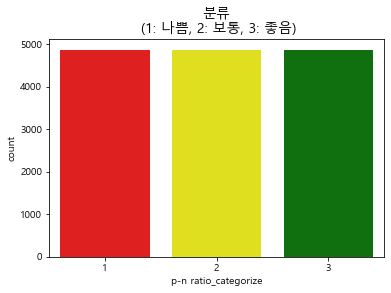

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

colors=['red','yellow','green']

sns.countplot('p-n ratio_categorize', data=df2, palette=colors)
plt.title("분류\n (1: 나쁨, 2: 보통, 3: 좋음)", fontsize=14)

In [15]:
X=df2[['days_after_releasing', 'average_playtime']]
y=df2['p-n ratio_categorize']

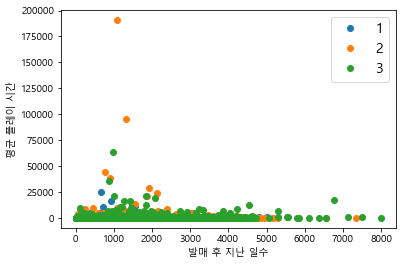

In [16]:
groups=df2.groupby('p-n ratio_categorize')
fig, ax=plt.subplots()
for x,group in groups:
    ax.plot(group.days_after_releasing, group.average_playtime, marker='o',linestyle='', label=x)
ax.legend(fontsize=14, loc='upper right')
plt.xlabel('발매 후 지난 일수')
plt.ylabel('평균 플레이 시간')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [18]:
from sklearn.svm import SVC
model=SVC(kernel='rbf').fit(X_train,y_train)

In [19]:
print("학습용 :", model.score(X_train, y_train))
print("검증용 :", model.score(X_test, y_test))

학습용 : 0.3559220646043411
검증용 : 0.3533834586466165


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model=SVC(kernel='rbf').fit(X_train_scaled,y_train)

In [22]:
print("학습용 :", model.score(X_train_scaled, y_train))
print("검증용 :", model.score(X_test_scaled, y_test))

학습용 : 0.36053666039993165
검증용 : 0.3520164046479836


In [23]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test_scaled)
cm=confusion_matrix(y_test, pred)
cm

array([[755,  50, 170],
       [729,  68, 179],
       [698,  70, 207]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}>

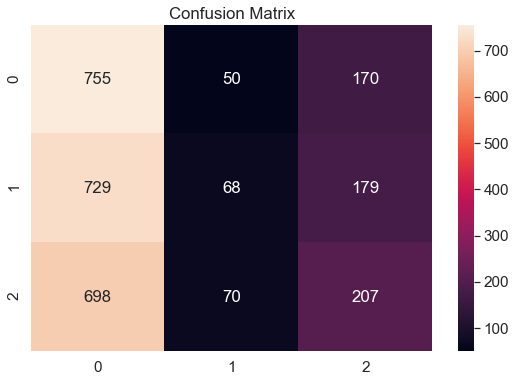

In [24]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d')